In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder

sns.set(style='ticks')
from library.sb_utils import save_file
%matplotlib inline

C:\Users\adame\AppData\Local\Temp\ipykernel_1060\2058884123.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# path is the raw csv file
path = r"C:\Users\adame\OneDrive\Documents\GitHub\springboard_repository\Capstone_books\Capstone_books\data\processed\cleaned_books.csv"
df = pd.read_csv(path, on_bad_lines='warn')

In [3]:
df.shape

(11123, 15)

In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_rating_mean,ratings_count_sum,text_reviews_count_sum
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,4.57,2096903,27669
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,4.49,2153167,29221
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,4.42,2300296,34936
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,4.56,2342726,36465
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,4.78,41428,164


In [5]:
df['ratings_count'].value_counts()

ratings_count
3         82
0         80
1         76
2         71
4         71
          ..
21507      1
6970       1
108440     1
66503      1
783        1
Name: count, Length: 5294, dtype: int64

In [6]:
df['text_reviews_count'].value_counts()

text_reviews_count
0        624
1        458
2        354
3        263
4        247
        ... 
4496       1
8251       1
13070      1
688        1
1830       1
Name: count, Length: 1822, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bookID                  11123 non-null  int64  
 1   title                   11123 non-null  object 
 2   authors                 11123 non-null  object 
 3   average_rating          11123 non-null  float64
 4   isbn                    11123 non-null  object 
 5   isbn13                  11123 non-null  int64  
 6   language_code           11123 non-null  object 
 7   num_pages               11123 non-null  int64  
 8   ratings_count           11123 non-null  int64  
 9   text_reviews_count      11123 non-null  int64  
 10  publication_date        11121 non-null  object 
 11  publisher               11123 non-null  object 
 12  average_rating_mean     11123 non-null  float64
 13  ratings_count_sum       11123 non-null  int64  
 14  text_reviews_count_sum  11123 non-null

In [8]:
# sort authors books by the sum of their ratings count and then by the mean of the ratings
df[['authors', 'ratings_count_sum', 'average_rating_mean']].sort_values(by=['ratings_count_sum', 'average_rating_mean'], ascending=False).head(10)

,authors,ratings_count_sum,average_rating_mean
10336,Stephenie Meyer,4597666,3.59
1697,J.R.R. Tolkien,2530894,4.27
1462,J.D. Salinger,2457092,3.80
307,Dan Brown,2425666,3.89
1226,Dan Brown,2425666,3.89
6936,Dan Brown,2425666,3.89
3,J.K. Rowling/Mary GrandPré,2342726,4.56
1233,J.K. Rowling,2342726,4.56
2,J.K. Rowling,2300296,4.42
4415,J.K. Rowling/Mary GrandPré,2300296,4.42


In [9]:
# sort titles by the sum of its ratings count and by the mean of the ratings
df[['title', 'ratings_count_sum', 'average_rating_mean']].sort_values(by=['ratings_count_sum', 'average_rating_mean'], ascending=False).head(10)

,title,ratings_count_sum,average_rating_mean
10336,Twilight (Twilight #1),4597666,3.59
1697,The Hobbit or There and Back Again,2530894,4.27
1462,The Catcher in the Rye,2457092,3.80
307,Angels & Demons (Robert Langdon #1),2425666,3.89
1226,Angels & Demons (Robert Langdon #1),2425666,3.89
6936,Angels & Demons (Robert Langdon #1),2425666,3.89
3,Harry Potter and the Prisoner of Azkaban (Harr...,2342726,4.56
1233,Harry Potter and the Prisoner of Azkaban (Harr...,2342726,4.56
2,Harry Potter and the Chamber of Secrets (Harry...,2300296,4.42
4415,Harry Potter and the Chamber of Secrets (Harry...,2300296,4.42


### Visualize relatioships between variables

##### Start with a pair plot to see all variables plotted against each other.

In [10]:
cols = ['average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count', 'average_rating_mean', 'ratings_count_sum', 'text_reviews_count_sum'] 
df_nums = df[cols]


C:\Users\adame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


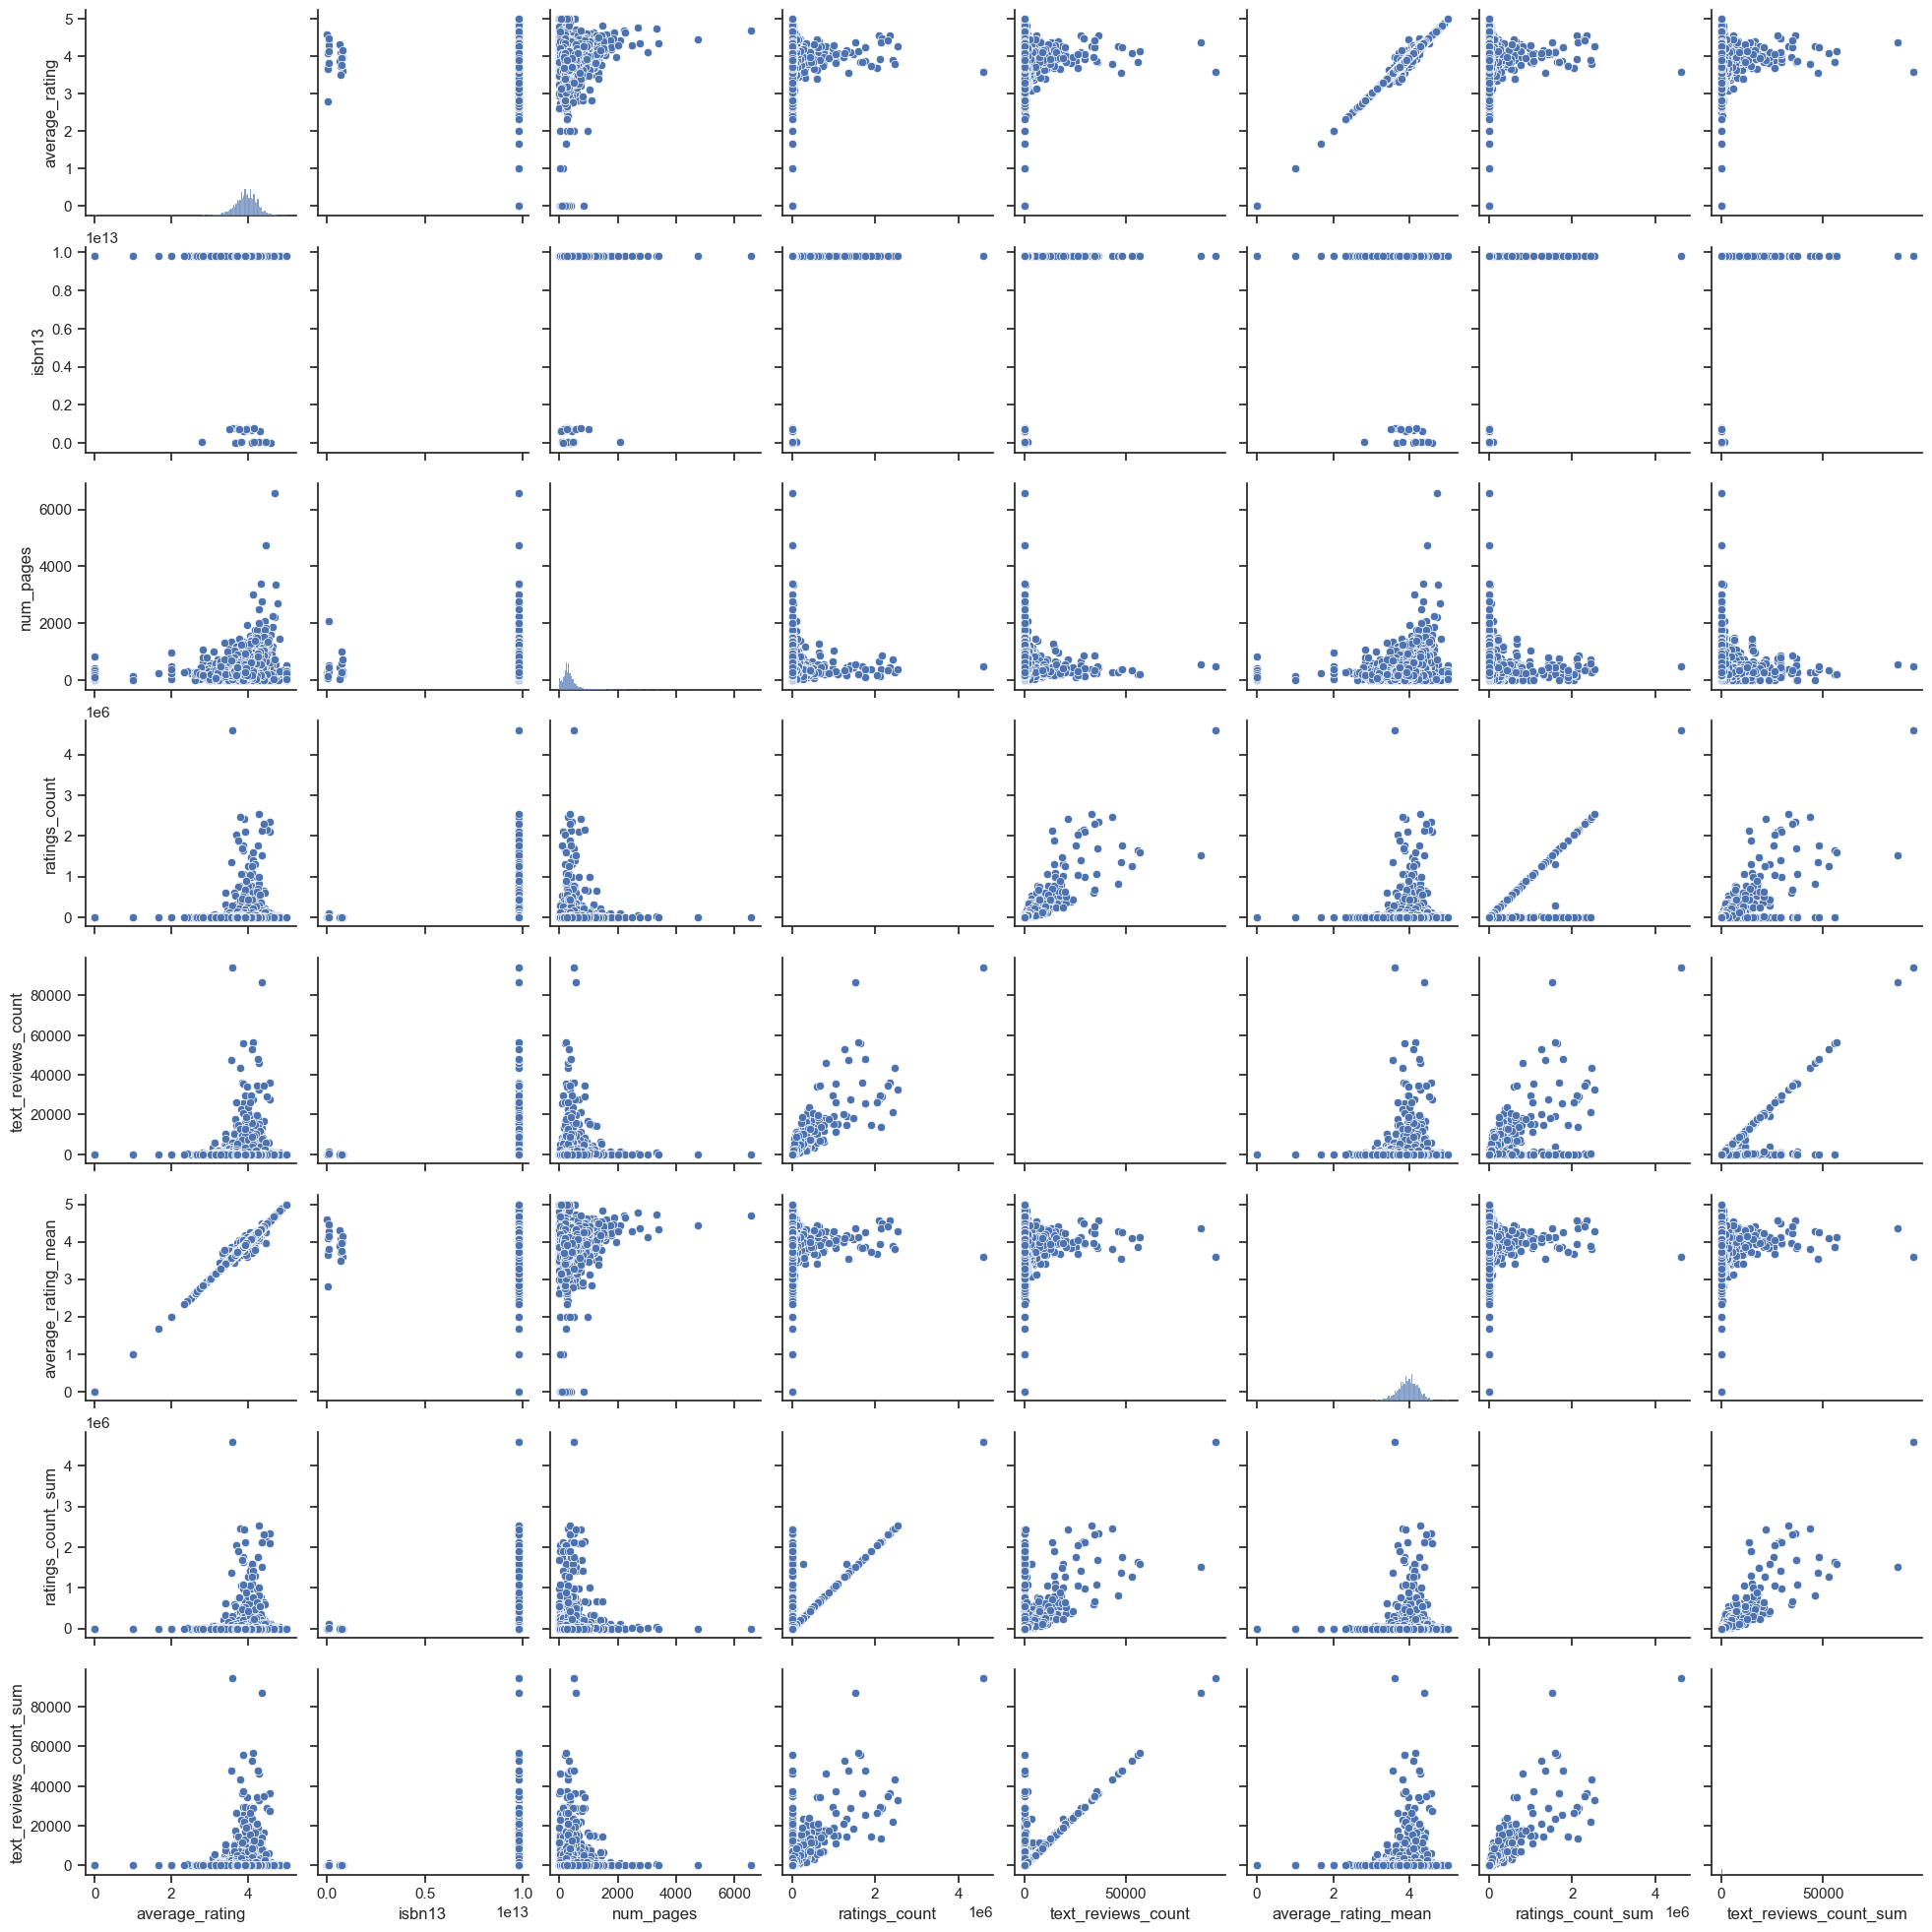

In [11]:
sns.pairplot(df_nums)
plt.show()

##### Some relationships look linear. Next will be a heat map

Text(0.5, 1.0, 'Correlation matrix')

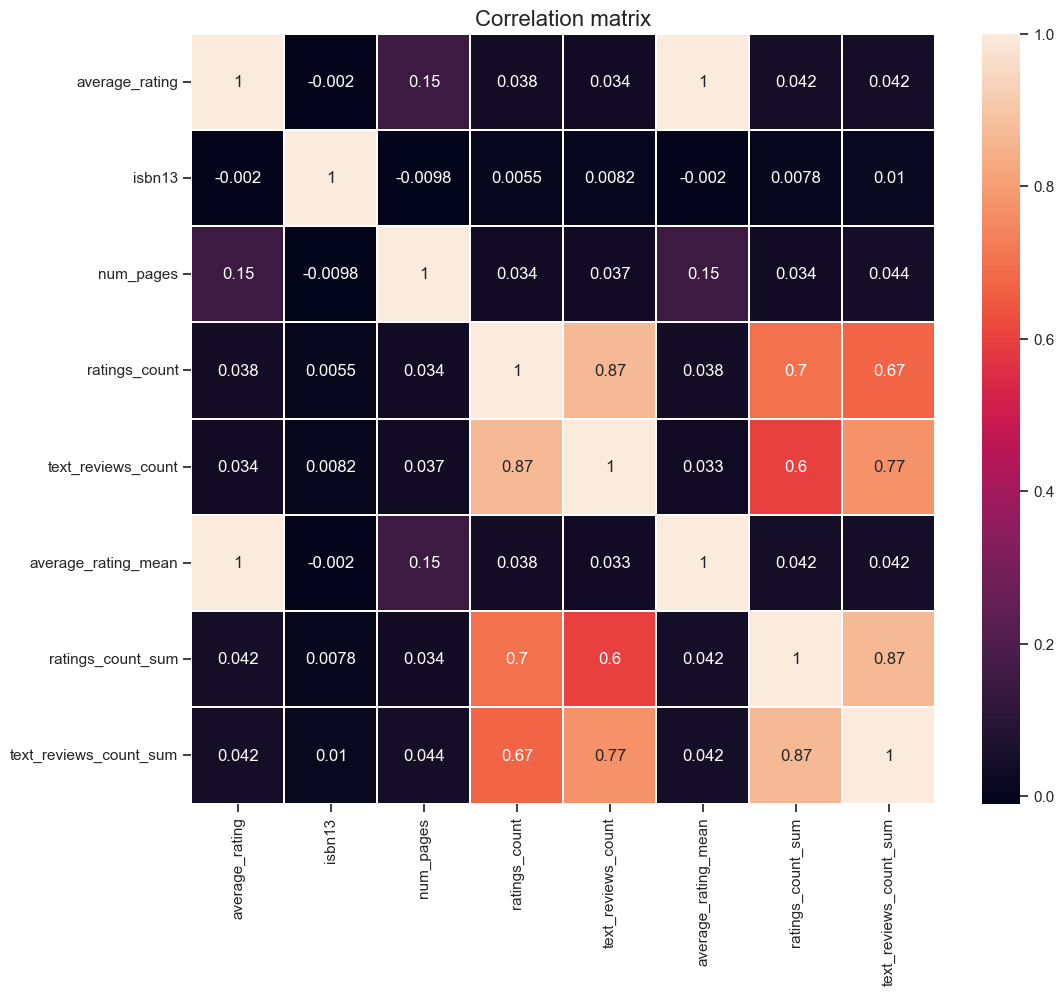

In [12]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_nums.corr(), annot=True, linewidth=.05)
plt.title('Correlation matrix', fontsize=16)

##### Because of the way the DataFrame is grouped(by titles), I will focus on columns with high correlation that are aggregated data. As in `text_reviews_count_sum` and `ratings_count_sum`. 

In [13]:
# function for scatter plots to explore correlated relationships
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'ratings_count_sum', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sum of ratings')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [14]:
# features to plot in scatte plots
features = [x for x in df.columns if x not in ['authors', 'bookID', 'title', 'language_code', 'publication_date', 'publisher']]

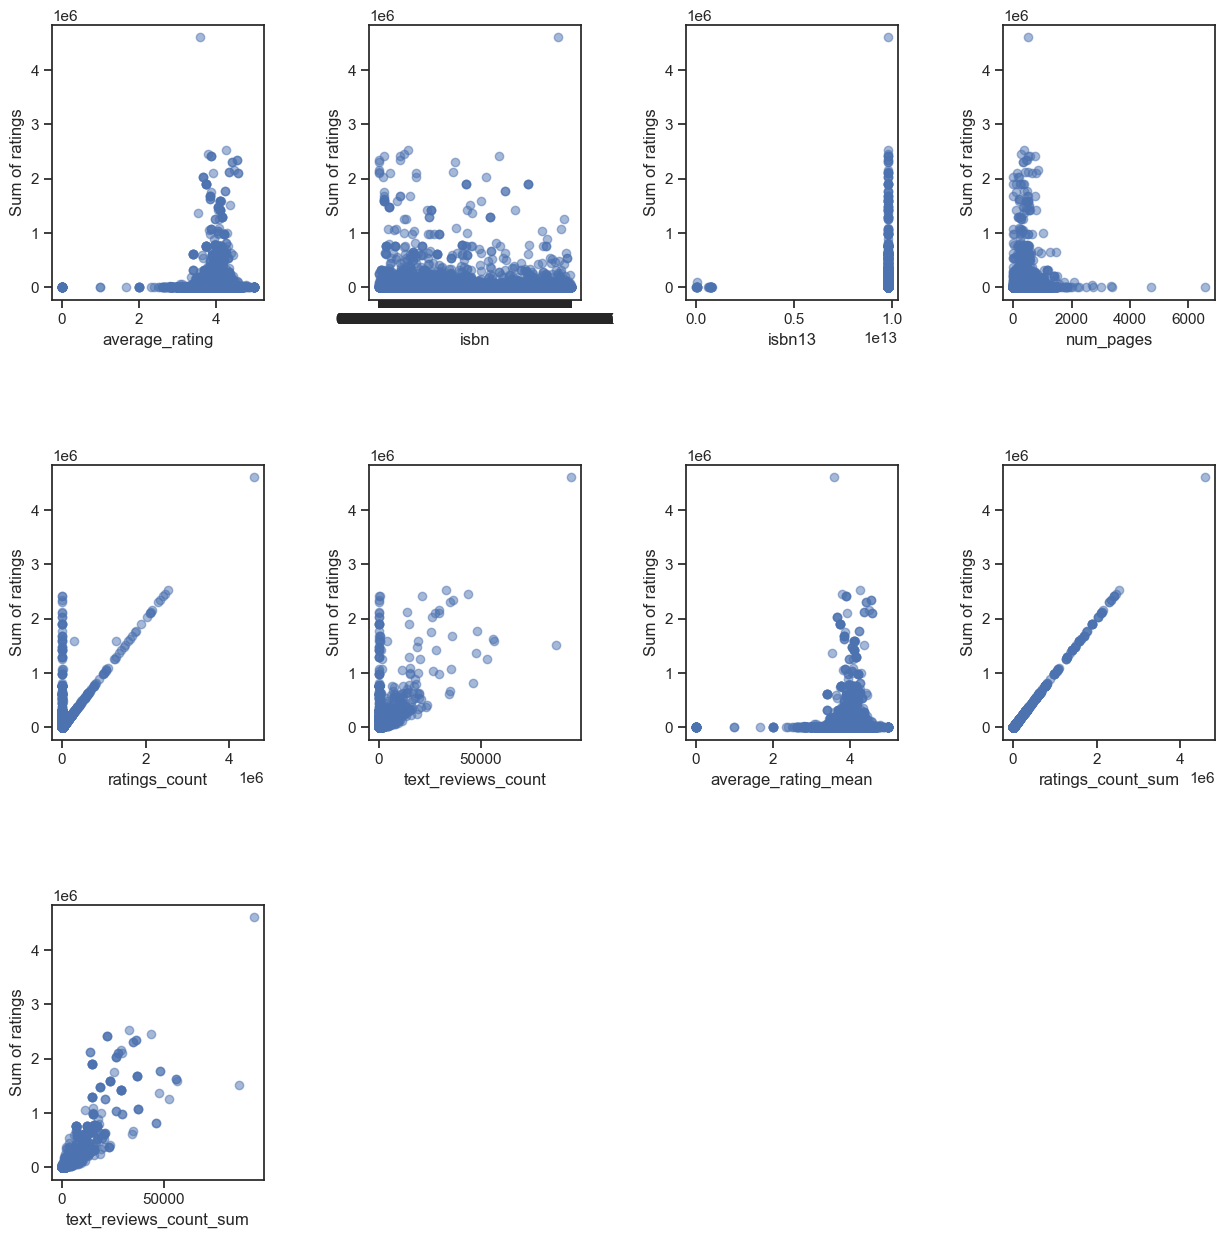

In [15]:
scatterplots(features, ncol=4, figsize=(15,15))

##### Here again a linear relationship can be seen between the amount of ratings a book has and the amount of text reviews a book has.

C:\Users\adame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


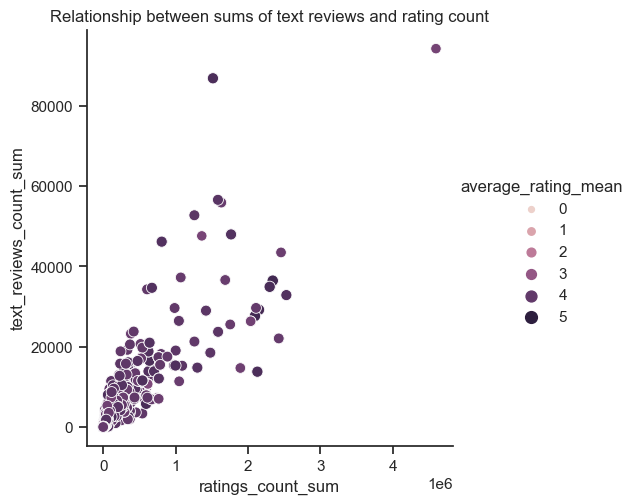

In [16]:
# use relation plot to get a better idea of how these two columns look together
sns.relplot(x='ratings_count_sum', 
            y='text_reviews_count_sum', 
            data=df, 
            kind='scatter',
           size='average_rating_mean',
           hue='average_rating_mean')
plt.title('Relationship between sums of text reviews and rating count')
plt.show()

C:\Users\adame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


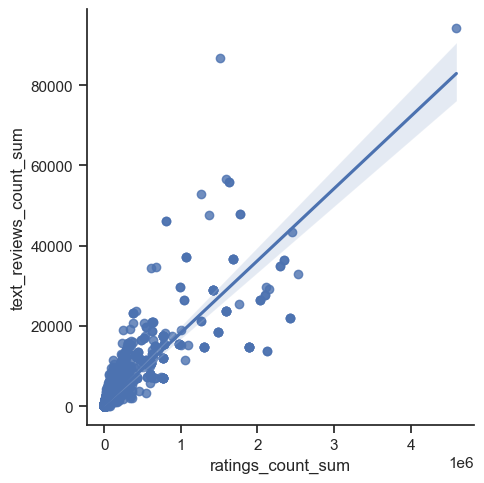

In [17]:
# use lmplot with a line of regression to verify linear relationship
sns.lmplot(data=df,
          x='ratings_count_sum',
          y='text_reviews_count_sum')

#### Another relationship to explore with a slight correlation is the number of pages in a book compared to the average rating. The column `average_rating_mean` is a grouped column of duplicate books. So books with zero duplicates just have an average rating, but books with duplicates share a mean average rating. Maybe a rating could be predicted based on the number of pages.

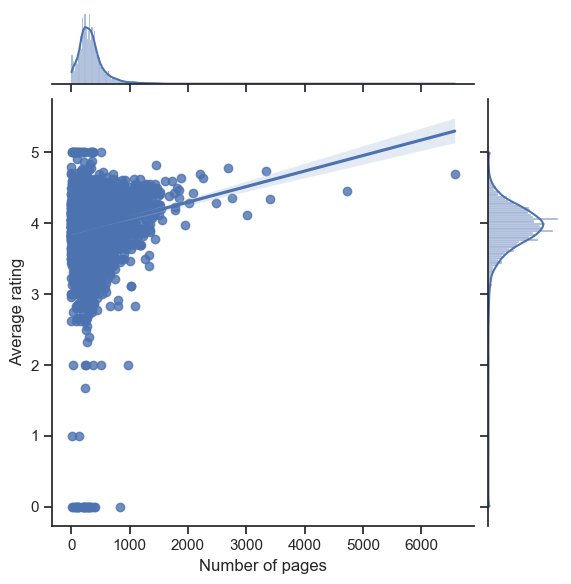

In [18]:
sns.jointplot(x='num_pages', y='average_rating_mean', data=df_nums, kind='reg');
_ = plt.xlabel('Number of pages')
_ = plt.ylabel('Average rating')

In [ ]:
# ProfileReport(df)